# Adamantane

Here we use the pyNMR to look at solid-state 1H NMR spectrum of adamantane (just because I just found this one). The spectrum was acquired using a 600MHz Bruker machine with 2.5mm MAS probe. Sample spinning speed was 20kHz. The data are in ./data/2.5mmAdam_23082016/2


In [1]:
# imports:
from __future__ import division
import sys

# add path to the pyNMR folder:
sys.path.insert(0,'../')

# import the nmrDataMod.py
import nmrDataMod as ndm

# and import some other usefull things:
from matplotlib import pyplot as plt
import numpy as np

# so we get to see the graphs:
%matplotlib inline

/Users/kk2d14/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Load the data and display the FID

In [2]:
# load the data:
pathAdam = './data/2.5mmAdam_23082016/2/'
adam = ndm.nmrData(pathAdam, "TopSpin")

Now we just created a nmrData object called adam.  It contains the FID data as recorded by the spectrometer. The FID timescale is stored in adam.fidTime, and the amplitudes are in adam.allFid[0][0]. The structure of the allFid can be a bit confusing at first: It is used to store snapshots of data as the processing advances - the data (FIDs and spectra alike) are accessed as allFid[pos][index] the pos is used to address different processing steps (our FID is at pos = 0, we just loaded it). The index is useful for 2D data (ser files), then it labels the different FIDs in the ser file (or the corresponding spectra). We deal with 1D experiment only so our index is 0 all the time. 

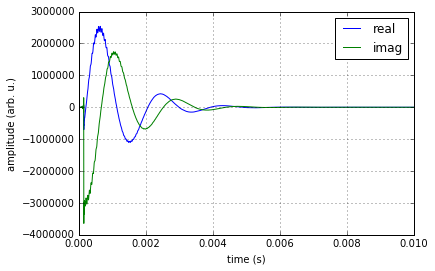

In [3]:
# plot the FID we just loaded:
realFid, = plt.plot(adam.fidTime, np.real(adam.allFid[0][0]), label = 'real')
imagFid, = plt.plot(adam.fidTime, np.imag(adam.allFid[0][0]), label = 'imag')

fidLimits = [0,0.01,-4e6,3e6]
plt.axis(fidLimits)
plt.legend(handles = [realFid, imagFid])
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('amplitude (arb. u.)')

plt.show()


## Remove the bruker digital filter
First ~70 points of the FID are not the actual data, we do a left shift to get rid of them and plot the FID again. This however rewrites the adam.fidTime (so we'll have a hard time plotting the original FID after we do this) - this will hopefully be fixed in future. 


In [4]:
#remove the bruker filter, run only once, otherwise the adam.fidTime gets messed up and the following plot fails:
shiftPoints = 70
adam.leftShift(0, 1, shiftPoints)

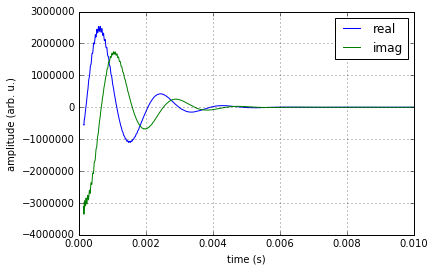

In [5]:
realFid, = plt.plot(adam.fidTime, np.real(adam.allFid[1][0]), label = 'real')
imagFid, = plt.plot(adam.fidTime, np.imag(adam.allFid[1][0]), label = 'imag')

plt.axis(fidLimits)
plt.legend(handles = [realFid, imagFid])
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('amplitude (arb. u.)')
plt.show()

## Line broadening
Next we apply some line broadening - we multiply the FID by an exponentially decaying function. This is not strictly necessary, but can be handy. We take the FID at position 1 apply the line broadening (10Hz) to it and write the result to position 2. 

In [6]:
adam.lineBroadening(1, 2, 10)

## Fourier transform
Now we are ready to do a Fourier transform and have a first look at the spectrum. This creates an array adam.frequency which stores the frequency axis. Zero frequency is at the offset (at the frequency we applied in the pulse). 

In [7]:
# we do the Fourier transform of FID stored at position 1 and write it to position 2:
adam.fourierTransform(2,3)

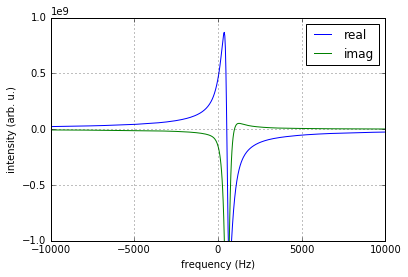

In [8]:
# here we plot the spectrum we just created
realSpectrum, = plt.plot(adam.frequency, np.real(adam.allFid[3][0]), label = 'real')
imagSpectrum, = plt.plot(adam.frequency, np.imag(adam.allFid[3][0]), label = 'imag')

spectrumLimits = [-1e4, 1e4, -1e9, 1e9]
plt.legend(handles = [realSpectrum, imagSpectrum])
plt.grid(True)
plt.xlabel('frequency (Hz)')
plt.ylabel('intensity (arb. u.)')
plt.axis(spectrumLimits)
plt.show()

## Phase correction
The spectrum above is obviously not well phased - we run a zero-order phase correction to fix this. 

In [9]:
# let's use the automatic zero-order phase correction to get the phase which gives 
# maximum real amplitude of spectrum at pos 3 (index 0) in frequency interval (-50000Hz,50000Hz):
phase = adam.autoPhase0(3, 0, -50000, 50000)
print phase

#here we apply the phase correction and write the result to pos 4:
adam.phase(3, 4, phase)


260.0


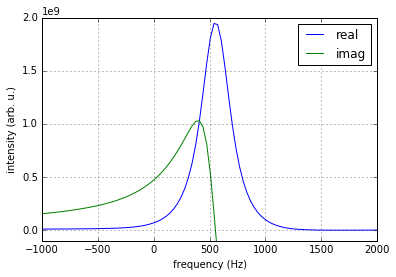

In [10]:
#let's plot the result:
realSpectrum, = plt.plot(adam.frequency, np.real(adam.allFid[4][0]), label = 'real')
imagSpectrum, = plt.plot(adam.frequency, np.imag(adam.allFid[4][0]), label = 'imag')

spectrumLimits = [-1e3, 2e3, -1e8, 2e9]
plt.legend(handles = [realSpectrum, imagSpectrum])
plt.grid(True)
plt.xlabel('frequency (Hz)')
plt.ylabel('intensity (arb. u.)')
plt.axis(spectrumLimits)
plt.show()